In [88]:
words = open('names.txt', 'r').read().splitlines()

In [89]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [90]:
len(words)

32033

In [91]:
min(len(w) for w in words)

2

In [92]:
max(len(w) for w in words)

15

For every word, actually we have more than one example of a name, more than one thing the model can learn. 

For example the name 'isabella' says that:

- It's very likely for a name to start with an 'i'
- It's very likely for a name to have an 's' if the first was 'i'
- It's very likely for a name to have an 'a' if the previous were 'is'
- ...
- Also, it's very likely for a name to end if the previous was 'isabella'

We have a lot more of just a name in terms of statistical structure of what's to follow in the sequences. And we have 32k.

### Bigram Language Model

We'll start with a bigram lm, where we work with just 2 characters at a time, the context size is 1 char.  

In [93]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        # zip takes 2 iterators, in this case w, w[1:] an returns the tuple for both
        # in this case w will have the char, and w[1:] will have the next 
        # it stops when any of the iterables ends
        print(ch1, ch2)

e m
m m
m a


But we also want to record when a word starts and ends, so we can add start and end tokens and modify this code to have a complete representation of what we want:

In [94]:
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


The easiest way to learn the statistics of which character will come after each character, is to simply count how often any of these combinations occurs in the training set.

As we a fixed number of combinations, we can do this by using a dictionary and count how much of each combination we have in our dataset.

In [95]:
b = {}

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        # we could do b[bigram] + 1, but that will fail if it doesn't exist
        b[bigram] = b.get(bigram, 0) + 1

b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


Let's look at the dictionary and see which are the most common bigrams

In [96]:
# sorted orders by keys but we want to sort by values
sorted(b.items(), key = lambda kv: -kv[1]) #kv = key value pair, kv[1] is the value
# the - is for inverse order we want

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

### Matrix for the data

As we want to process the data easily, it will be better is we have this result in a matrix.

The representation we will use is a square matrix with the length of the alphabet, where rows are the first char, and col the second. Each entry in the matrix tells us how many times the bigram of rowindex-colindex appears in the dataset.

We will use Pytorch to create this representation, with it we can create multidimensional arrays and manipulate them very efficiently.

The alphabet has 26 letters, adding the start and end chars, we have 28.

In [97]:
import torch

N = torch.zeros((28, 28), dtype=torch.int32) #it's only integers,

In [98]:
# join every word, set drops duplicates, list them and sort them
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

Now let's encode each letter with a number

In [99]:
stoi = {s:i for i, s in enumerate(chars)} # this creates an index
# define manually the special chars
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

Now assign the right value to each entry of the matrix

In [100]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # this is each word
    for ch1, ch2 in zip(chs, chs[1:]): # we iterate each word
        ix1 = stoi[ch1] # encoding
        ix2 = stoi[ch2]
        # rows are the first char, cols the second
        N[ix1, ix2] += 1 # the particular bigram appeared, so we add 1 to the corresponding entry

Let's visualize it with matplotlib

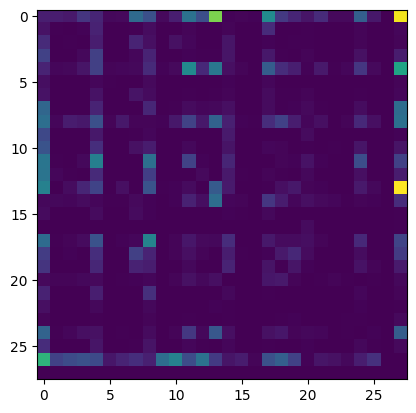

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

But Andrej says it can be prettier:

In [102]:
itos = {i:s for s, i in stoi.items()} 

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

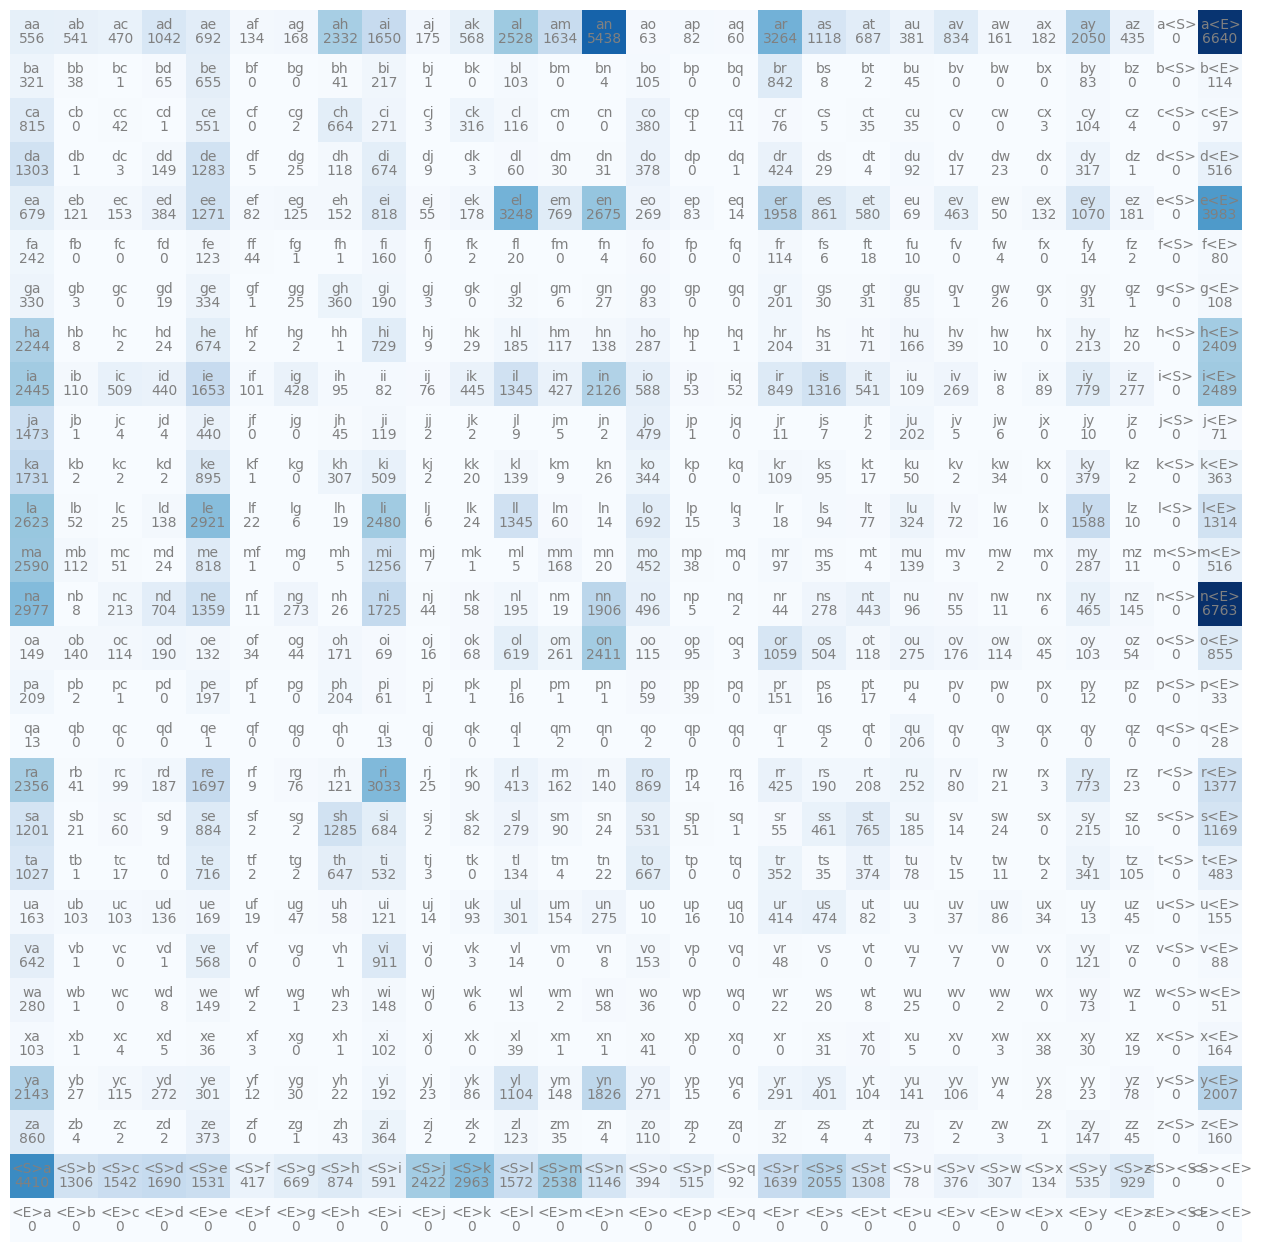

In [103]:
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

As we can see we have some cols and rows with zeros because they are not possible combinations, like a letter before the start, of after the end.

In order to fix this issue of inefficiency, what we can do is only use one special token, if it is before a word, it's the start, if it is after, it is the end.

Let's see how the code gets modified:

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

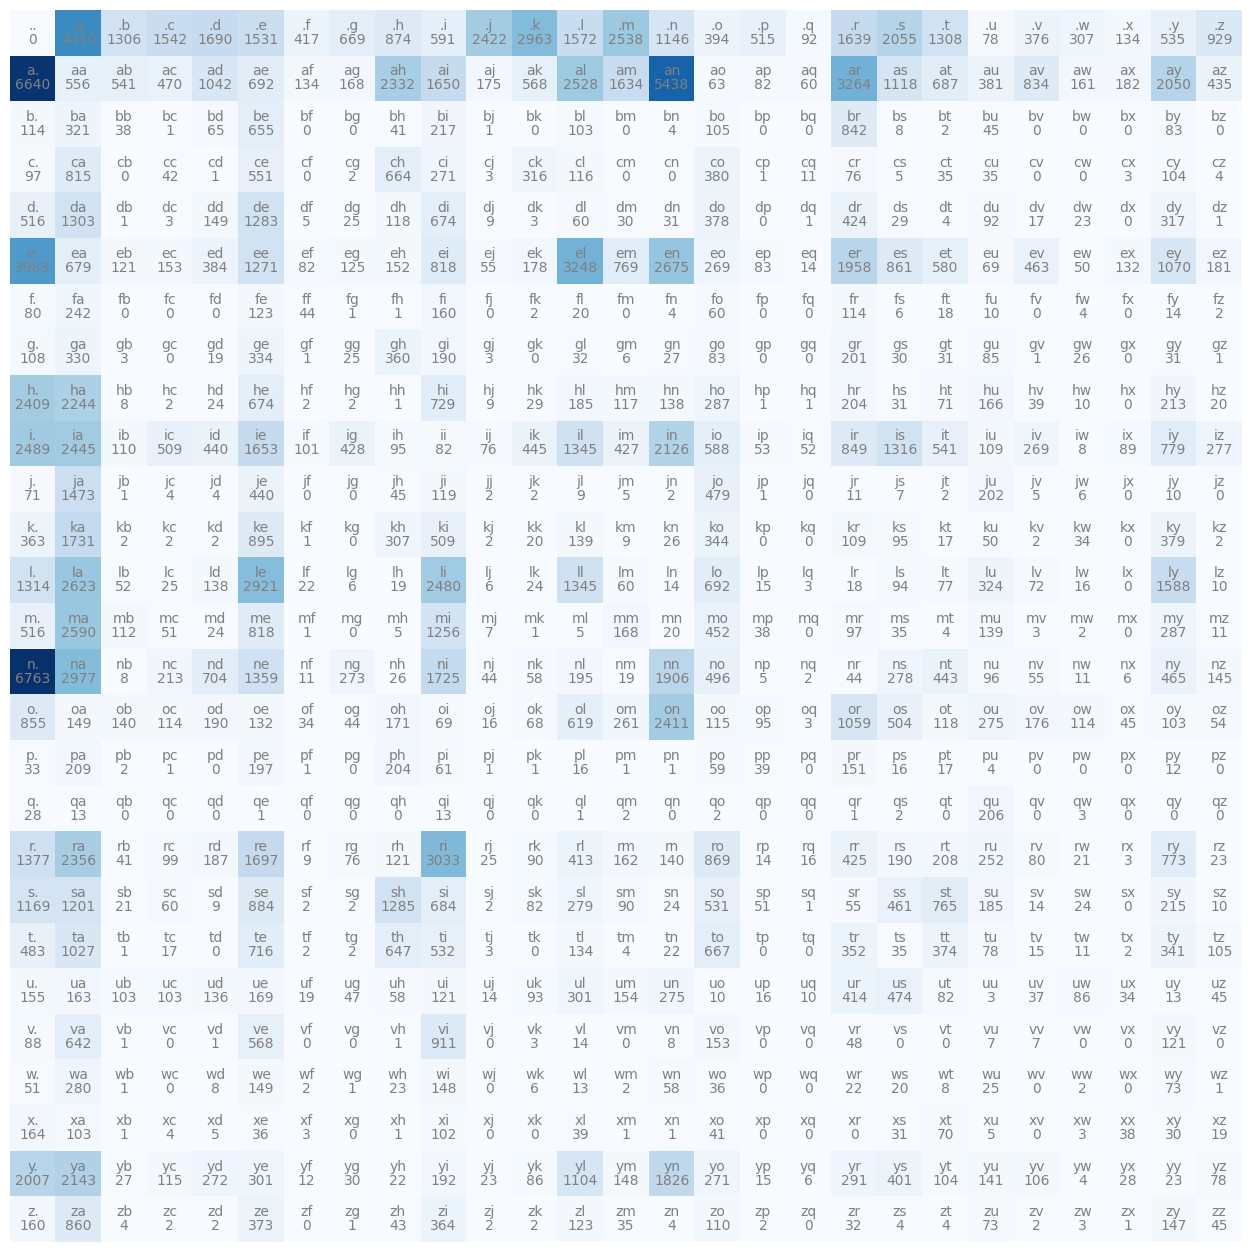

In [104]:
N = torch.zeros((27, 27), dtype=torch.int32) #one dimension less

stoi = {s:i+1 for i, s in enumerate(chars)} # move all one place
stoi['.'] = 0 # fst possition

itos = {i:s for s, i in stoi.items()} 

for w in words:
    chs = ['.'] + list(w) + ['.'] # this is each word
    for ch1, ch2 in zip(chs, chs[1:]): # we iterate each word
        ix1 = stoi[ch1] # encoding
        ix2 = stoi[ch2]
        # rows are the first char, cols the second
        N[ix1, ix2] += 1 # the particular bigram appeared, so we add 1 to the corresponding entry

%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

### Sampling from the model

Now with this model, we can start sampling from it.

What we are going to do is start following these probabilities to generate words.

We always start with the dot (start), with some entry of the first row actually.

In [105]:
p = N[0].float() # is the first row, but we need probabilities:
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

To sample from these distribution we will use torch.multinomial, which basically, when you give it probabilities for some array, it returns integers sampled from 'the options' according to the probability distribution.

In order to make everything deterministic, we can use 'torch.generator' which gives a random number but if you set a seed, it will be always the same.

In [106]:
g = torch.Generator().manual_seed(2147483647)
pb = torch.rand(3, generator=g) 
pb /= pb.sum()
pb

tensor([0.6064, 0.3033, 0.0903])

In [107]:
torch.multinomial(pb, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

Let's use our probabilities from the first row

In [109]:
g = torch.Generator().manual_seed(2147483647)
# ix is for index
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(ix)
itos[ix]

3


'c'

Now we got that letter, to continue with our sampling, we can go to the row that has that leeter, and do the same process to discover what letter should we continue with.

Let's now define the loop with which we are going to sample new names!

**My fast trial:**

In [114]:
ix = 0 # every word starts with '.'
word = '.'
while True:

    p = N[ix].float() # select the specific character row
    p = p / p.sum() # normalize
    # 'calculate' the next char
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ixstr = itos[ix] # get the actual char
    word = list(word) +[ixstr] # append to the word we are generating

    if ixstr == '.': # end if it's 'the end'
        break

print(word)

['.', 's', 'l', 'a', 'n', 'y', '.']


**Ok, it's pretty much the same**

In [141]:
ix = 0 # every word starts with '.'

for i in range(20):
    out = []
    while True:
        p = N[ix].float() # select the specific character row
        p = p / p.sum() # normalize
        # 'calculate' the next char
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])

        if ix == 0: # end if it's 'the end'
            break

    print(''.join(out))

y.
kann.
kax.
maan.
morian.
da.
ke.
rn.
riaastelesama.
jann.
ln.
heriz.
enieyn.
ada.
sie.
n.
ser.
caenarannela.
kunnaynti.
ala.


We could say that this is horrible, but to convince ourselves that it could be worse, let's create a 'completely untrained model', with all the same probability:

In [119]:
ix = 0 # every word starts with '.'

for i in range(20):
    out = []
    while True:
        #p = N[ix].float() # select the specific character row
        #p = p / p.sum() # normalize

        # instead of taking the probabilities learnt, we just take a normalized ones:
        p = torch.ones(27) / 27.0

        # 'calculate' the next char
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])

        if ix == 0: # end if it's 'the end'
            break

    print(''.join(out))

hcmu.
kikvzc.
deyvldrhzfjsgnsravypssrwszvtyshjwlmrdebntgclopmwofsn.
z.
jpauqhadxmsmsepiu.
zlloktegofnbvihecfcrjuu.
.
gtclasmurjavpo.
ykzglmlbnwsxvogjnbbpausxcwvfgbowqnoansdmvhsl.
wwilllzspifvpvtpaqavsqsm.
scpunvc.
xqbvysdotbkgoqzmzhcslpinoqwxfygyigfkqmoogaqxkdjhzivnleymwzznkknv.
skirzaahmduh.
gjwafwzlpzbykrn.
nqqkawrfqsf.
nadicsjdxtvgqqvofupqwoqoebzbxlgxfgxlqyriojfvlpsnrrxjgqhcpohpmcnr.
keeqlohgoi.
rwwljgxpaatjgmjuooksazwam.
eygqhsfzocrfazmnbdqhjrqmdkfamyigfhdcipfx.
pvmrmkornvwfykwlpiwsuywfyzpprmdllkucewnelqjgoofckajmzlj.


We can see how it is actually worse.

### Efficiency upgrade

As we can see, in the previous workflow, we could be calculating every row's probabilities multiple times, so it can be more efficient if we do that only one time before:

In [121]:
P = torch.zeros((27, 27), dtype=torch.float32)

for ix in range (27):

    P[ix] = N[ix].float() # select the specific character row
    P[ix] /= P[ix].sum() # normalize

This works but using some pytorch and tensor manipulation we can do it simpler:

In [155]:
P = (N+1).float()
P.sum(0) #fst param is the dimension we want to sum (if empty sums everything)
print(P.sum(0).shape) # it gives you an array

print(P.sum(1, keepdim=True).shape) # using keepdim return actually a matrix with the same dimension
P.sum(1, keepdim=True) # we want to sum each row for that is the 1


torch.Size([27])
torch.Size([27, 1])


tensor([[32060.],
        [33912.],
        [ 2672.],
        [ 3559.],
        [ 5523.],
        [20450.],
        [  932.],
        [ 1954.],
        [ 7643.],
        [17728.],
        [ 2927.],
        [ 5067.],
        [13985.],
        [ 6669.],
        [18354.],
        [ 7961.],
        [ 1053.],
        [  299.],
        [12727.],
        [ 8133.],
        [ 5597.],
        [ 3162.],
        [ 2600.],
        [  956.],
        [  724.],
        [ 9803.],
        [ 2425.]])

These are rules to follow while doing 'operations'

**General semantics for Broadcasting**

Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.

- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

**So, what we are doing when calculating 27x27 / 27x1, actually is** that as we have a square matrix, and a vertical vector, pytorch takes that vector and reproduces it 27 times to create another square matrix.

And that's what we want, to normalize every row of our matrix to have the proper probabilities.

In [156]:
P /= P.sum(1, keepdim=True) #inplace operations are more efficient, it doesn't create new memory
P[0].sum() #normalized

tensor(1.)

Now our loop looks like this:

In [157]:
ix = 0 # every word starts with '.'

for i in range(20):
    out = []
    while True:
        p = P[ix] # return the corresponding 'probability vector'
        # 'calculate' the next char
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])

        if ix == 0: # end if it's 'the end'
            break

    print(''.join(out))

cemihounria.
one.
zulainaa.
amidin.
azan.
da.
erilelia.
jan.
a.
es.
z.
seredydanaleyra.
blaynn.
a.
to.
pa.
witalaian.
armeecaun.
joraph.
daasnelick.


**Note:** Broadcasting is something we should study and be respectful with, because it can easily get us in trouble.

## Evaluation of the model

We want to rate out model just by a number for example, to see how good it is generating new names. Actually, creating a **loss function**

**How could we evaluate it?**

As we've seen, an 'untrained model' should have all the probabilities normalized, i.e. 1/27 = .037

Something razonable is that if certain probability is above that number, it's because our model has learnt something from the data set. A really good model, show have some probabilities near to 1, that means that it's pretty sure about what letter comes next, specially on the train set where it was trained. 

This is how we can measure how good our model is.

**An idea came to my mind.** We could calculate the avarage distance (normalized) of each param to the 1/27

In [158]:
rating = 0
for row in range(P.shape[0]):
    for col in range(P.shape[1]):
        if P[row, col] < 1/27:
            distance = (1/27 - P[row, col]) * 27 # (/ 1/27) 
            # this is to normalize the distance if it is above or below the 1/27
        else: 
            distance = (P[row, col] - 1/27)/ (1-1/27)
        
        rating += distance

print(distance)

        

tensor(0.4878)


This approach calculates the distance of the param to 1/27 

Note that it sums zero if it is 1/27 or close to zero if the param is close to zero.

And it's high if all our params are close to 1 or 0, which actually is our ideal.

### Actual way to do it

Any way the approach people use does not look like this at all. 

'Proba things' in coming:

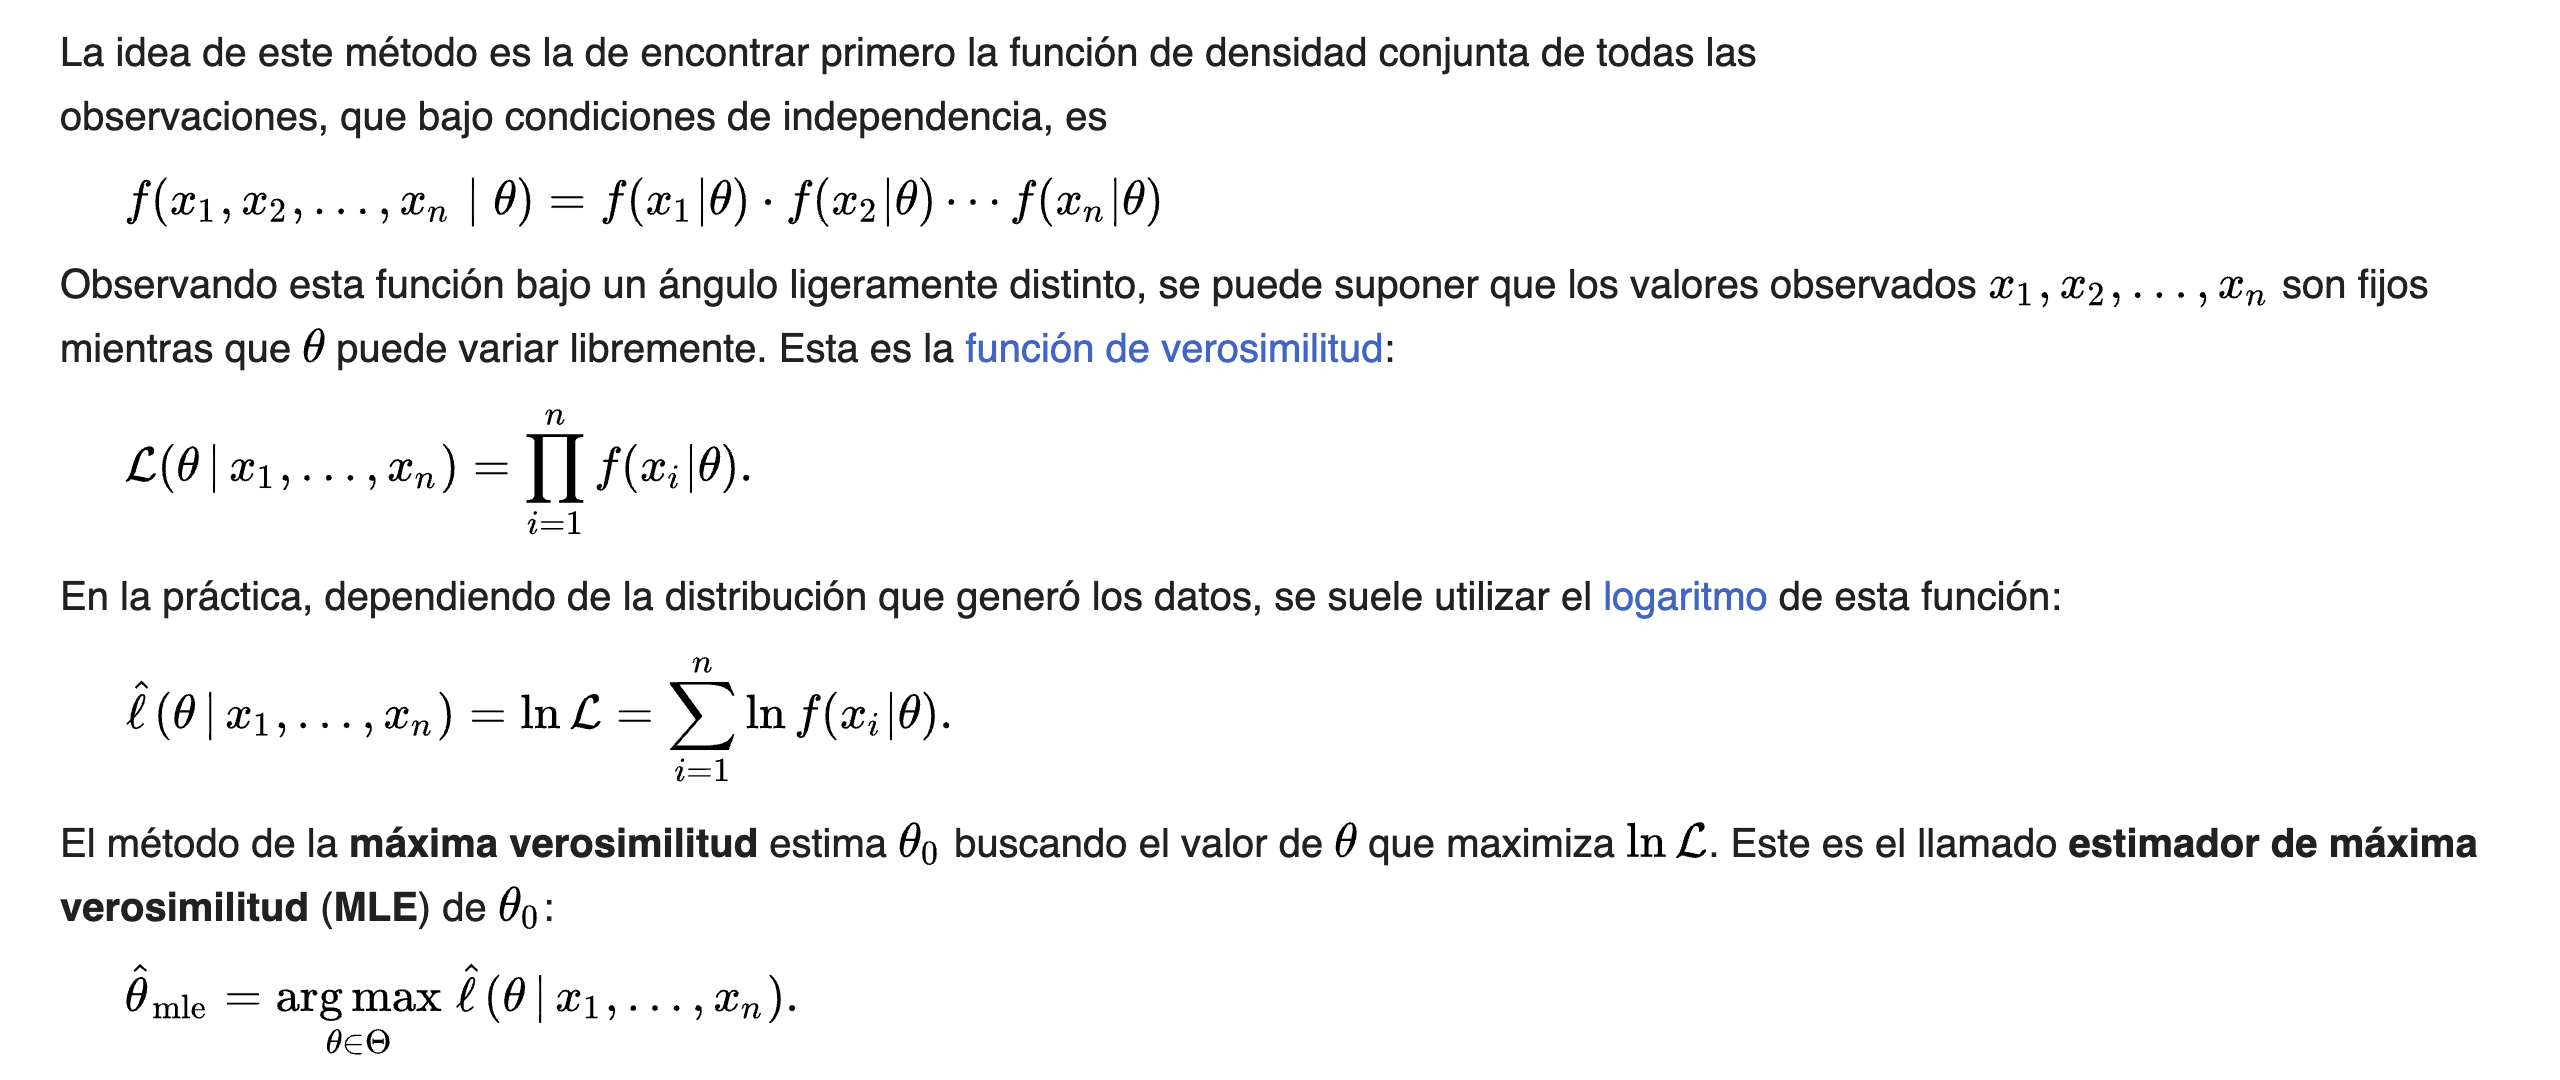

This basically says that we have to multiply every posibility to know the quality of our approximation. The fundamental thing to have in mind is that is you have 3 independent probabilities, the likelihood of the three at a time is the product of them.

As every param is between 0 and 1, the product will be too close to zero. Because of that we can apply a log to it, which is 0 if we have all ones, and that's (apearently)

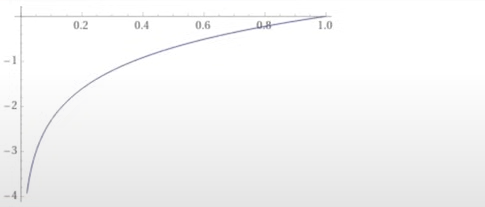

For logs, we have that: 
$log(abc) = log(a) + log(b) + log(c)$

Then we can do:

In [160]:
prob_likelihood = 0
n = 0
#for ix1 in range(P[:1].shape[0]):
    #for ix2 in range(P.shape[1]):
#for w in words:
for w in ['gabrieljq']:
    chs = ['.'] + list(w) + ['.'] # this is each word
    for ch1, ch2 in zip(chs, chs[1:]): # we iterate each word
        ix1 = stoi[ch1] # encoding
        ix2 = stoi[ch2]

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        prob_likelihood += -logprob

        n += 1
        
        print(f'{itos[ix1], itos[ix2]}: {prob:.4f}, {logprob:.4f}')
print(f'{prob_likelihood/n}')

('.', 'g'): 0.0209, -3.8681
('g', 'a'): 0.1694, -1.7755
('a', 'b'): 0.0160, -4.1363
('b', 'r'): 0.3155, -1.1536
('r', 'i'): 0.2384, -1.4338
('i', 'e'): 0.0933, -2.3719
('e', 'l'): 0.1589, -1.8396
('l', 'j'): 0.0005, -7.5998
('j', 'q'): 0.0003, -7.9817
('q', '.'): 0.0970, -2.3331
3.449361801147461


Here we used $P = N + k$, where $k$ is a natural number, the more big the number is, the more 'smoth' the model is, and the more small, the more 'picked' it'll be.

--- 

# Neural Network Approach

### Bigrams Approach Review

- With the bigrams we could train a respectable character-level language model, we trained it by looking a calculating the probability for each token to be followed by another.

- Then we saw that we could use this parameters to perform sampling of new words according to that distribution.

- And we also saw that we can evaluate the quality of the model summarized in a single number, and the lower the number is, the better our model is. 

The fact about this model is that we arrived those parameters just by performing counts that were logical to us.

Now let's take a very different approach. **We are gonna cast the problem of bigram character level language into the neural network framework**.

It will work similar. It will receive a character, and the output will be a probability distribution of what the following character should be. In addition to that, we will have the possibility to evaluate every parameter of the setting, because we have a loss function. We are gonna watch the probability distribution and see the labels (the actual next character of the bigram that is in a particular word of the dataset). Then see how much probability the model gives to that character (we want it to be high, the loss is low).

To tune the parameters of this network, we are gonna use gradient-based optimization. 

### Let's begin

In [167]:
# create the training set of the bigrams
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.'] # this is each word
    for ch1, ch2 in zip(chs, chs[1:]): # we iterate each word
        ix1 = stoi[ch1] # encoding
        ix2 = stoi[ch2]

        xs.append(ix1) # for each bigram in the dataset we append the first char
        ys.append(ix2) # for each bigram in the dataset we append the second char

# but we need to convert them to tensors
xs = torch.tensor(xs) # using .Tensor automatically set dtype to float, .tensor keeps the dtype
ys = torch.tensor(ys)
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

### Encoding Integers into Vectors

We'll use the one_hot encoding to represent integers as vectors with a ones:

$4 = (0, 0, 0, 0, 1, 0, ..., 0)$ with the length of the alphabet we are using 

In [168]:
import torch.nn.functional as F
xenc = F.one_hot(xs, 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

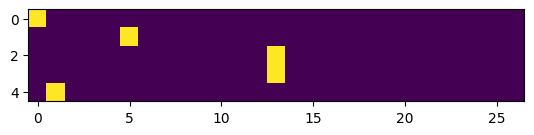

In [169]:
plt.imshow(xenc)

### First Neuron

The first neuron will look at one of these vectors (X), and make a matrix product, and an addition: 
$xW + B$

In [170]:
W = torch.randn(27, 1) # we need to have the same number of rows as the one hot encoding
xenc @ W

tensor([[-0.2177],
        [ 0.1127],
        [-1.3425],
        [-1.3425],
        [ 0.2046]])

Now we want 27 neurons instead of only 1

In [171]:
W = torch.randn(27, 27)
xenc @ W

tensor([[-1.2519, -0.5886, -1.6465,  0.0261,  0.3173, -0.4101, -0.4472, -0.5726,
          1.0415,  0.7763,  0.5345, -1.0280,  1.8553, -1.3500,  0.8746,  0.8430,
         -0.3227,  0.8918, -0.2095,  0.5804, -0.6474,  0.4714,  0.5796, -0.4655,
          1.9597,  0.0546, -0.7887],
        [-0.6714,  1.4553, -1.0350,  0.0340,  0.0139, -1.1043,  1.6599, -1.0757,
          1.8148,  1.7160,  1.7498,  1.5516, -1.1962, -0.4090, -1.3631, -0.6701,
         -0.0637, -0.3779,  0.4756,  0.3934, -0.0933, -1.5969,  0.1888,  1.5031,
          0.0735, -1.6719, -1.4429],
        [-1.3400, -0.5457,  1.3285, -0.5977,  0.0082, -0.2615,  1.6867,  0.4769,
         -1.7483,  0.8780, -0.8941, -0.2733,  0.7740,  1.1562, -0.7429,  0.5778,
          0.1052,  0.5751, -1.6536, -0.2872,  1.4970, -1.3004,  0.4125, -0.5639,
          1.1950, -0.1774, -1.2580],
        [-1.3400, -0.5457,  1.3285, -0.5977,  0.0082, -0.2615,  1.6867,  0.4769,
         -1.7483,  0.8780, -0.8941, -0.2733,  0.7740,  1.1562, -0.7429,  0.5778

In [173]:
(xenc @ W).shape # now we have the result of applying 27 different weights to the same input

torch.Size([5, 27])

In [174]:
(xenc @ W)[3, 13] # this is the result of the 14th neuron looking at the 4th input

tensor(1.1562)

This is how we can evaluate this calculations very efficiently using matrices.

In addition to this multiplication, we are not going to add a bias, or a non linearity, or a new layer, this is it. The simplest dumbest neural net. Because of this, we want that example showed above, the probability distribution of the next character to predict, in the one-hot encoding.

But the numbers of this output are negative or too big, and for probability, we need them all to be positive and to sum up to 1. 

We can see them as if they were the log result of other numbers, to calculate those number we can apply the opposite transformation: the exponential, that takes negative numbers and outputs between 0 and 1, and positive numbers between 1 and positive infinity.

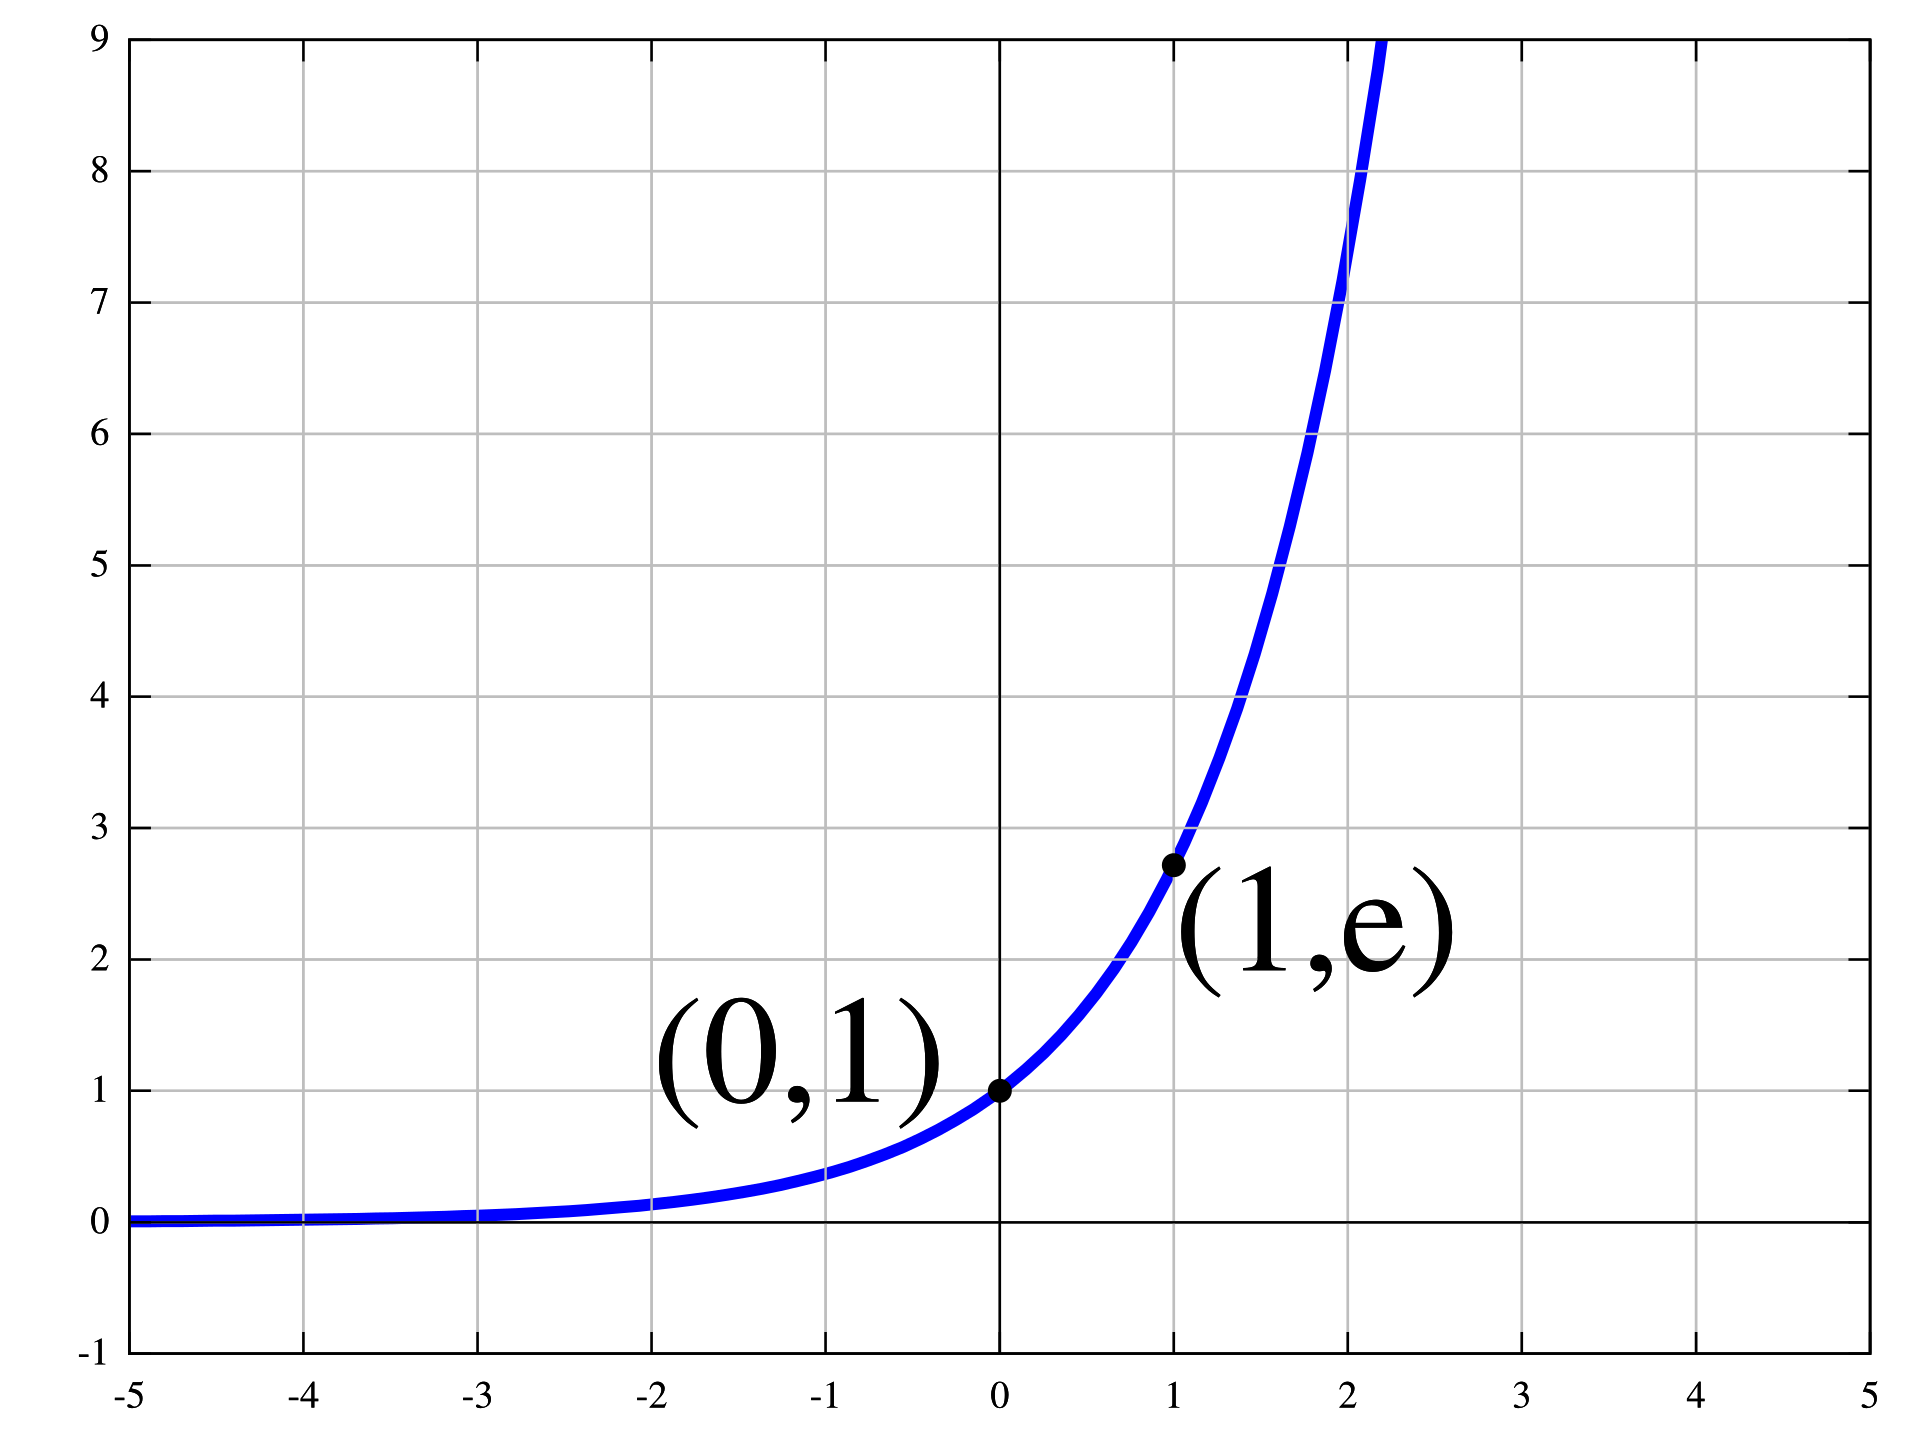

These positive numbers can now be interpreted as countings, as we had before, they are all positive but not normalized. The more high the more probabble, trying to decide which of the characters is to come next:

$[0.0067, 0.0130, 0.0045, 0.0241, 0.0322, 0.0156, 0.0150, 0.0132, 0.0664,
         0.0510, 0.0400, 0.0084, 0.1499, 0.0061, 0.0562, 0.0545, 0.0170, 0.0572,
         0.0190, 0.0419, 0.0123, 0.0376, 0.0419, 0.0147, 0.1664, 0.0248, 0.0107]$

This is called the **softmax function**

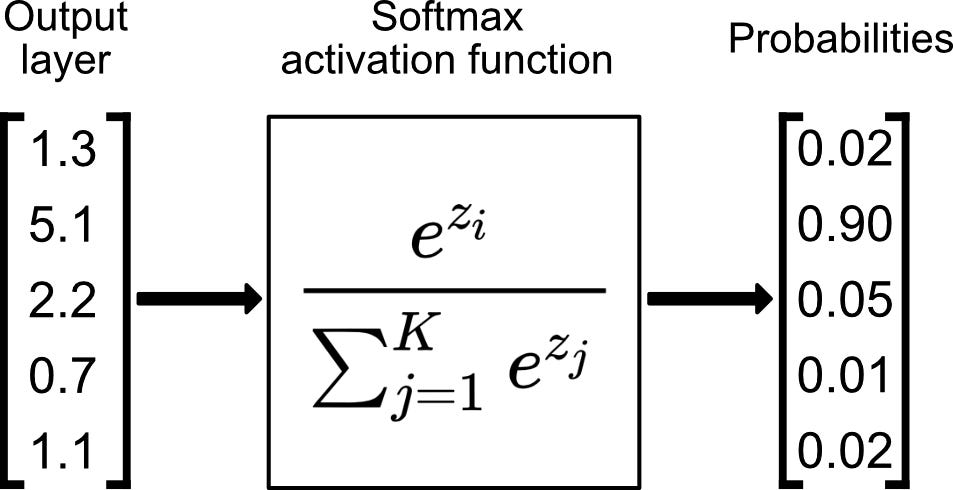

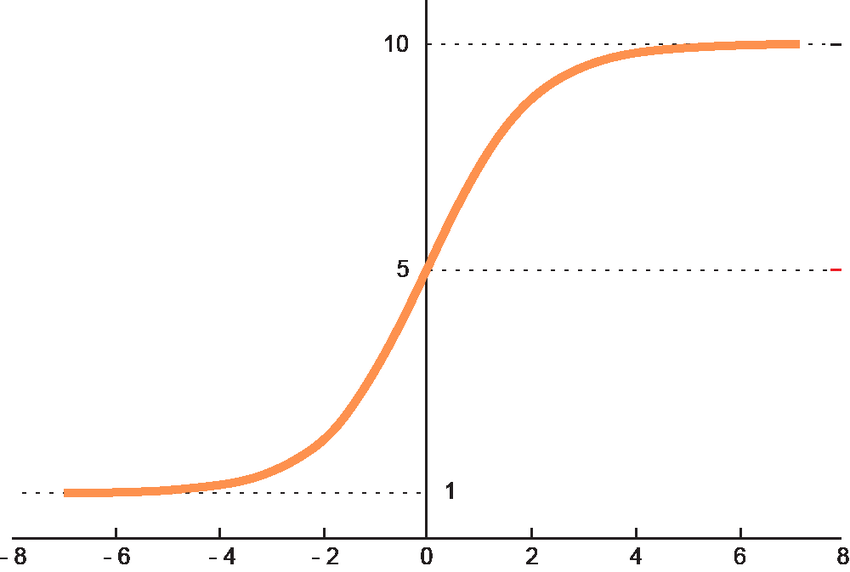

In [176]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N matrix

# now normalize the counts

probs = counts / counts.sum(1, keepdim=True) # we sum over the columns as we did before
probs

tensor([[0.0067, 0.0130, 0.0045, 0.0241, 0.0322, 0.0156, 0.0150, 0.0132, 0.0664,
         0.0510, 0.0400, 0.0084, 0.1499, 0.0061, 0.0562, 0.0545, 0.0170, 0.0572,
         0.0190, 0.0419, 0.0123, 0.0376, 0.0419, 0.0147, 0.1664, 0.0248, 0.0107],
        [0.0102, 0.0856, 0.0071, 0.0207, 0.0203, 0.0066, 0.1050, 0.0068, 0.1226,
         0.1111, 0.1149, 0.0942, 0.0060, 0.0133, 0.0051, 0.0102, 0.0187, 0.0137,
         0.0321, 0.0296, 0.0182, 0.0040, 0.0241, 0.0898, 0.0215, 0.0038, 0.0047],
        [0.0065, 0.0143, 0.0935, 0.0136, 0.0250, 0.0191, 0.1337, 0.0399, 0.0043,
         0.0596, 0.0101, 0.0188, 0.0537, 0.0787, 0.0118, 0.0441, 0.0275, 0.0440,
         0.0047, 0.0186, 0.1106, 0.0067, 0.0374, 0.0141, 0.0818, 0.0207, 0.0070],
        [0.0065, 0.0143, 0.0935, 0.0136, 0.0250, 0.0191, 0.1337, 0.0399, 0.0043,
         0.0596, 0.0101, 0.0188, 0.0537, 0.0787, 0.0118, 0.0441, 0.0275, 0.0440,
         0.0047, 0.0186, 0.1106, 0.0067, 0.0374, 0.0141, 0.0818, 0.0207, 0.0070],
        [0.0132, 0.1098,

In [178]:
print(probs[0].sum())
print(probs.shape)

tensor(1.)
torch.Size([5, 27])


So these are probability vectors and we can interpret as that. 

Most important, the multiplication, the exponentiation, and normalization (addition and division), are differentiable operations. That means that we can back propagate through. 

## Training

### Let's begin seeing how is our loss with some examples

In [212]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(27, 27, generator=g, requires_grad=True)

nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram
    x = xs[i].item() # input
    y = ys[i].item() # output
    # we need to get the probability of the output given the input
    print("------")
    print(f"bigram example {itos[x]}{itos[y]}")
    print(f"actual label: {y}")
    p = probs[i, y]
    print(f"probability assigned by the model to the correct character: {p}")

    nnl = -torch.log(p)
    print(f"negative log likelihood: {nnl}")
    nlls[i] = nnl

print(nlls.mean().item())



------
bigram example .e
actual label: 5
probability assigned by the model to the correct character: 0.012557622976601124
negative log likelihood: 4.377427577972412
------
bigram example em
actual label: 13
probability assigned by the model to the correct character: 0.018430696800351143
negative log likelihood: 3.9937376976013184
------
bigram example mm
actual label: 13
probability assigned by the model to the correct character: 0.02721692994236946
negative log likelihood: 3.6039161682128906
------
bigram example ma
actual label: 1
probability assigned by the model to the correct character: 0.074986033141613
negative log likelihood: 2.5904533863067627
------
bigram example a.
actual label: 0
probability assigned by the model to the correct character: 0.015290402807295322
negative log likelihood: 4.180530071258545
3.7492129802703857


### Forward Pass

In [213]:
xenc = F.one_hot(xs, 27).float() # one hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N matrix
probs = counts / counts.sum(1, keepdim=True) # probabilities for the next character

In [214]:
print(ys)
xenc.shape

tensor([ 5, 13, 13,  1,  0])


torch.Size([5, 27])

Probabilities we are interested in:

In [215]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

A way to access these probabilities more efficiently is using 'arange':

In [216]:
-probs[torch.arange(5), ys].log().mean()

tensor(3.7693, grad_fn=<NegBackward0>)

Finally the complete forward pass is:

In [232]:
xenc = F.one_hot(xs, 27).float() # one hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N matrix
probs = counts / counts.sum(1, keepdim=True) # probabilities for the next character
loss = -probs[torch.arange(5), ys].log().mean()

### Backward pass

loss.backward() calculates the gradient of the loss with respect to the parameters.

When we do the forward pass, pytorch keeps track of all the operations under the hood (it builds a computational graph just like micrograd). When we calculate the loss, we can calculate the .backward on it, and that backward fills the gradients of everything, all the way down to W's, which are the ones that we can optimize.

In [233]:
#check the gradient to zero
W.grad = None

loss.backward()

These are the gradients calculated. Every entry of `W.grad` tells us the influence of that weight on the loss function. Specifically, the gradient indicates how much the loss function will increase if we adjust the weight in the direction of the gradient. 

In backpropagation, this means that if `W.grad` is positive, increasing `W` would increase the loss, so we decrease `W` to reduce the loss. Conversely, if `W.grad` is negative, decreasing `W` would increase the loss, so we increase `W` to reduce the loss. This iterative process helps to optimize the weights and improve the model's predictions.


In [234]:
print(W.grad.shape)
W.grad

torch.Size([27, 27])


tensor([[ 0.0122,  0.0020,  0.0025,  0.0008,  0.0034, -0.1974,  0.0005,  0.0047,
          0.0028,  0.0063,  0.0016,  0.0056,  0.0018,  0.0017,  0.0100,  0.0472,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0306,  0.0291],
        [-0.1968,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0216,  0.0026,
          0.0025,  0.0010,  0.0204,  0.0017,  0.0197,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0179,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

### Weights Updates

In [235]:
W.data += -0.1 * W.grad

If we run this procedure multiple times, we will se how the loss function decreases.

In [236]:
loss.item()

3.7091541290283203

### Loop with all the dataset

In [237]:
for i in range(100):
    # forward pass
    xenc = F.one_hot(xs, 27).float() # one hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N matrix
    probs = counts / counts.sum(1, keepdim=True) # probabilities for the next character
    loss = -probs[torch.arange(5), ys].log().mean()
    # backward pass
    W.grad = None
    loss.backward()
    # update weights
    W.data += -0.1 * W.grad

    print(loss.item())

3.6891887187957764
3.66926646232605
3.6493873596191406
3.6295523643493652
3.6097614765167236
3.5900158882141113
3.5703155994415283
3.5506606101989746
3.531052350997925
3.5114905834198
3.491975784301758
3.4725089073181152
3.453089952468872
3.4337196350097656
3.414397716522217
3.3951258659362793
3.375903606414795
3.356731414794922
3.3376102447509766
3.318540096282959
3.2995219230651855
3.2805557250976562
3.26164174079895
3.242781162261963
3.2239737510681152
3.2052199840545654
3.18652081489563
3.1678760051727295
3.1492867469787598
3.1307530403137207
3.1122748851776123
3.09385347366333
3.075488567352295
3.0571811199188232
3.038931369781494
3.0207395553588867
3.0026066303253174
2.984531879425049
2.9665169715881348
2.948561191558838
2.930665969848633
2.9128310680389404
2.895056962966919
2.8773443698883057
2.8596930503845215
2.842103958129883
2.8245770931243896
2.8071131706237793
2.789712429046631
2.7723748683929443
2.7551016807556152
2.7378923892974854
2.720747709274292
2.7036681175231934
2.

We can see that we achieved a pretty similar result compared to the previous approach, but this time using optimization